Generate the relevant vizualizations:

* Basic level: NEXT vs Salmon vs random

Why does Salmon do so much better?

* Embedding? Perform the same search use NEXT/Salmon embedding code.
* Searches? Use same backend, different search params.
    * → also show Salmon has effective engineering
    
Why is Salmon's search so much better?

* How does round robin affect different search lengths?
* How does top-k affect long search?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from viz import lineplot
save_kwargs = dict(dpi=300, bbox_inches="tight", transparent=False)

In [4]:
nm = "CKL"
d = 2

ACC_YLIM = (0.80, 0.835)
ANS_XLIM = (0, 25_000)

In [5]:
def _get_n_search(x: str) -> int:
    for j in ["-1_responses.csv.zip", "salmon/io/2021-05-26-search/TSTE-"]:
        assert j in x
        x = x.replace(j, "")
    k, v = x.split("=")
    assert k == "n_search"
    return int(v)
def _get_meta(x, key="n_search"):
    for j in  ["salmon/io/2021-07-01-arr-search/ARR-", "-1_responses.csv.zip"]:
        x = x.replace(j, "")
    n_search, n_top = x.split("-")
    assert "n_search=" in n_search and "n_top=" in n_top
    if key == "n_search":
        k_v = n_search.split("=")
    elif key == "n_top":
        k_v = n_top.split("=")
    else:
        raise ValueError(f"key={key} not recnogized")
    return int(k_v[1])

df = pd.read_csv("_viz_data.csv")
good = df.meta__priority.isnull()
df = df[good]

In [6]:
df["error"] = 1 - df["accuracy"]

print(len(df))
idx = (df.meta__noise_model == nm) & (df.meta__d == d)
df = df[idx].copy()
print(df.meta__meta__fname.unique())
print(len(df))

idx = df.meta__sampling == "random"
random = df[idx].copy()
active = df[~idx].copy()
NEXT = df[df.meta__sampling == "next"].copy()


fnames = df.meta__meta__fname.copy()
fnames[fnames.isnull()] = "random"
greedy = df[fnames.apply(lambda x: "/TSTE-" in x)].copy()
assert all(greedy.meta__meta__fname.apply(lambda x: "2021-05-26" in x))

greedy["meta__n_search"] = greedy["meta__meta__fname"].apply(_get_n_search)

arr = df[fnames.apply(lambda x: "/ARR-" in x)].copy()
assert all(arr.meta__meta__fname.apply(lambda x: "2021-07-01-arr-search" in x))

for key in ["n_search", "n_top"]:
    arr[f"meta__{key}"] = arr.meta__meta__fname.apply(_get_meta, key=key)

assert len(random) and len(NEXT) and len(greedy) and len(arr)
df.columns

448
['salmon/io/2021-05-26-search/TSTE-n_search=100-1_responses.csv.zip'
 'salmon/io/2021-05-26-search/TSTE-n_search=300-1_responses.csv.zip'
 'salmon/io/2021-05-26-search/TSTE-n_search=3000-1_responses.csv.zip'
 'salmon/io/2021-05-26-search/TSTE-n_search=30000-1_responses.csv.zip'
 'salmon/io/2021-05-26-search/TSTE-n_search=300000-1_responses.csv.zip'
 'salmon/io/2021-05-26-search/TSTE-n_search=1000-1_responses.csv.zip'
 'salmon/io/2021-07-01-arr-search/ARR-n_search=1000-n_top=1-1_responses.csv.zip'
 'salmon/io/2021-07-01-arr-search/ARR-n_search=10000-n_top=1-1_responses.csv.zip'
 'salmon/io/2021-07-01-arr-search/ARR-n_search=100000-n_top=1-1_responses.csv.zip'
 'salmon/io/2021-05-26-search/TSTE-n_search=10000-1_responses.csv.zip'
 'salmon/io/2021-07-01-arr-search/ARR-n_search=3000-n_top=1-1_responses.csv.zip'
 'salmon/io/2021-07-01-arr-search/ARR-n_search=30000-n_top=1-1_responses.csv.zip'
 'salmon/io/2021-07-01-arr-search/ARR-n_search=352440-n_top=1-1_responses.csv.zip'
 'salmon/io/

Index(['Unnamed: 0', 'accuracy', 'nn_diff_median', 'nn_diff_mean', 'nn_acc',
       'avg_items_closer_than_NN', 'nn_diff_p99', 'nn_diff_p98', 'nn_diff_p95',
       'nn_diff_p90', 'nn_diff_p80', 'nn_diff_p70', 'nn_diff_p60',
       'nn_diff_p50', 'nn_diff_p40', 'nn_diff_p30', 'nn_diff_p20',
       'nn_diff_p10', 'nn_diff_p5', 'nn_diff_p2', 'nn_diff_p1',
       'embedding_error', 'embedding_rel_error', 'procrustes_disparity',
       'nn_acc_radius_0', 'nn_acc_radius_1', 'nn_acc_radius_2',
       'nn_acc_radius_3', 'nn_acc_radius_4', 'nn_acc_radius_5',
       'nn_acc_radius_6', 'nn_acc_radius_7', 'nn_acc_radius_8',
       'nn_acc_radius_9', 'nn_acc_radius_10', 'nn_acc_radius_11',
       'nn_acc_radius_12', 'nn_acc_radius_13', 'nn_acc_radius_14',
       'nn_acc_radius_15', 'nn_acc_radius_16', 'nn_acc_radius_17',
       'nn_acc_radius_18', 'nn_acc_radius_19', 'nn_acc_radius_20',
       'nn_acc_radius_21', 'nn_acc_radius_22', 'nn_acc_radius_23',
       'nn_acc_radius_24', 'nn_acc_radius_25',

In [7]:
arr.meta__meta__fname.unique()

array(['salmon/io/2021-07-01-arr-search/ARR-n_search=1000-n_top=1-1_responses.csv.zip',
       'salmon/io/2021-07-01-arr-search/ARR-n_search=10000-n_top=1-1_responses.csv.zip',
       'salmon/io/2021-07-01-arr-search/ARR-n_search=100000-n_top=1-1_responses.csv.zip',
       'salmon/io/2021-07-01-arr-search/ARR-n_search=3000-n_top=1-1_responses.csv.zip',
       'salmon/io/2021-07-01-arr-search/ARR-n_search=30000-n_top=1-1_responses.csv.zip',
       'salmon/io/2021-07-01-arr-search/ARR-n_search=352440-n_top=1-1_responses.csv.zip',
       'salmon/io/2021-07-01-arr-search/ARR-n_search=352440-n_top=10-1_responses.csv.zip',
       'salmon/io/2021-07-01-arr-search/ARR-n_search=352440-n_top=100-1_responses.csv.zip',
       'salmon/io/2021-07-01-arr-search/ARR-n_search=352440-n_top=1000-1_responses.csv.zip',
       'salmon/io/2021-07-01-arr-search/ARR-n_search=352440-n_top=3-1_responses.csv.zip',
       'salmon/io/2021-07-01-arr-search/ARR-n_search=352440-n_top=30-1_responses.csv.zip',
       's

# Search length

Getting different samplers.

In [8]:
def _fmt(axs):
    ax = axs[0]
    ax.set_ylim(0.15, 0.24)
    ax.set_title("Test error")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x * 100:0.0f}%"))
    
    ax = axs[1]
    ax.set_ylim(0, 9)
    ax.set_ylabel("Avg. distance\n(# of neighbors)")
    ax.set_title("Distance to true\nnearest neighbor")
    for ax in axs:
        ax.grid(alpha=0.5)
        ax.set_xlim(0, 7200)
#         ax.set_xlim(0, None)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x / 1000)))
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        ax.set_xlabel("Num. responses / 1000")
    return axs

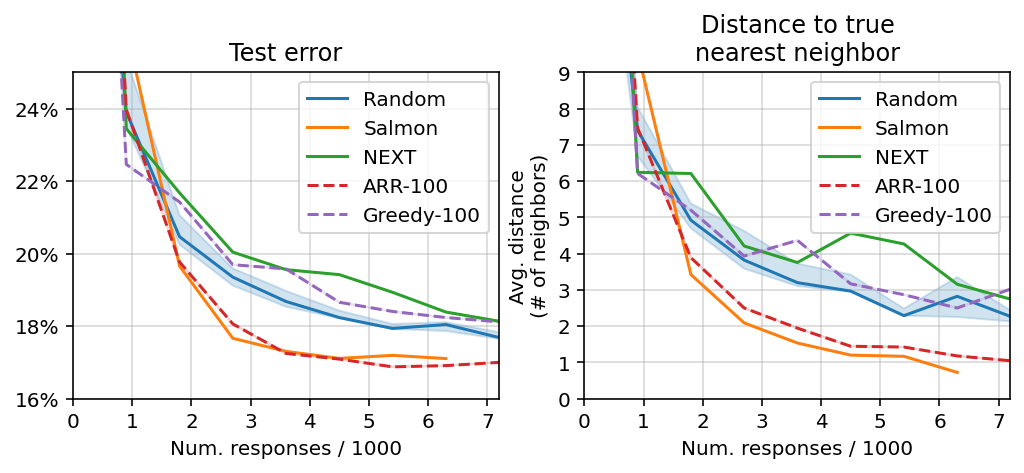

In [10]:
from viz import lineplot

l = "meta__sampling"
Greedy = greedy[greedy.meta__n_search == 100].copy()
Greedy[l] = "Greedy-100"
ARRm = arr[(arr.meta__n_top == 1) & (arr.meta__n_search == 10_000)].copy()
ARRm[l] = "ARR-100"
Salmon = arr[(arr.meta__n_top == 1) & (arr.meta__n_search == 90 * 89 * 88 // 2)].copy()
Salmon[l] = "Salmon"
NEXT_ = NEXT.copy()
NEXT_[l] = "NEXT"
Random_ = random.copy()
Random_[l] = "Random"

show = pd.concat((Greedy, ARRm, NEXT_, Random_, Salmon))

hue_order = ["Random", "Salmon", "NEXT", "ARR-100", "Greedy-100"]
static = dict(
    x="meta__len_X_train",
    hue="meta__sampling",
    hue_order=hue_order,
    style=["-", "-", "-", "--", "--"],
    palette=[f"C{k}" for k in range(len(hue_order))],
    data=show,
    ci=0.2,
)
w = 3
fig, axs = plt.subplots(ncols=2, figsize=(2 * 1.4 * w, w))
ax = lineplot(
    y="error",
    **static,
    ax=axs[0],
)
# ax.legend_.remove()

ax = lineplot(
    y="nn_diff_mean",
    **static,
    ax=axs[1],
)
axs = _fmt(axs)
axs[0].set_ylim(0.16, 0.25)
axs[1].yaxis.set_major_locator(plt.MultipleLocator(1))
fig.savefig("figures/synthetic-comparison.png", **save_kwargs)

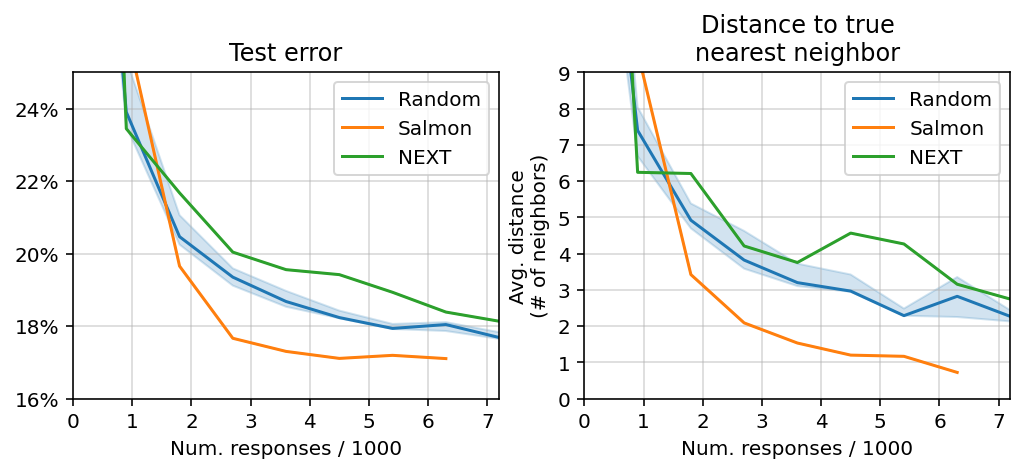

In [11]:
from viz import lineplot

l = "meta__sampling"
Greedy = greedy[greedy.meta__n_search == 100].copy()
Greedy[l] = "Greedy-100"
ARRm = arr[(arr.meta__n_top == 1) & (arr.meta__n_search == 10_000)].copy()
ARRm[l] = "ARR-100"
Salmon = arr[(arr.meta__n_top == 1) & (arr.meta__n_search == 90 * 89 * 88 // 2)].copy()
Salmon[l] = "Salmon"
NEXT_ = NEXT.copy()
NEXT_[l] = "NEXT"
Random_ = random.copy()
Random_[l] = "Random"

show = pd.concat((Greedy, ARRm, NEXT_, Random_, Salmon))

hue_order = ["Random", "Salmon", "NEXT"]#, "ARR-100", "Greedy-100"]
static = dict(
    x="meta__len_X_train",
    hue="meta__sampling",
    hue_order=hue_order,
    style=["-", "-", "-", "--", "--"],
    palette=[f"C{k}" for k in range(len(hue_order))],
    data=show,
    ci=0.2,
)
w = 3
fig, axs = plt.subplots(ncols=2, figsize=(2 * 1.4 * w, w))
ax = lineplot(
    y="error",
    **static,
    ax=axs[0],
)
# ax.legend_.remove()

ax = lineplot(
    y="nn_diff_mean",
    **static,
    ax=axs[1],
)
axs = _fmt(axs)
axs[0].set_ylim(0.16, 0.25)
axs[1].yaxis.set_major_locator(plt.MultipleLocator(1))
fig.savefig("figures/synthetic-comparison-2.png", **save_kwargs)

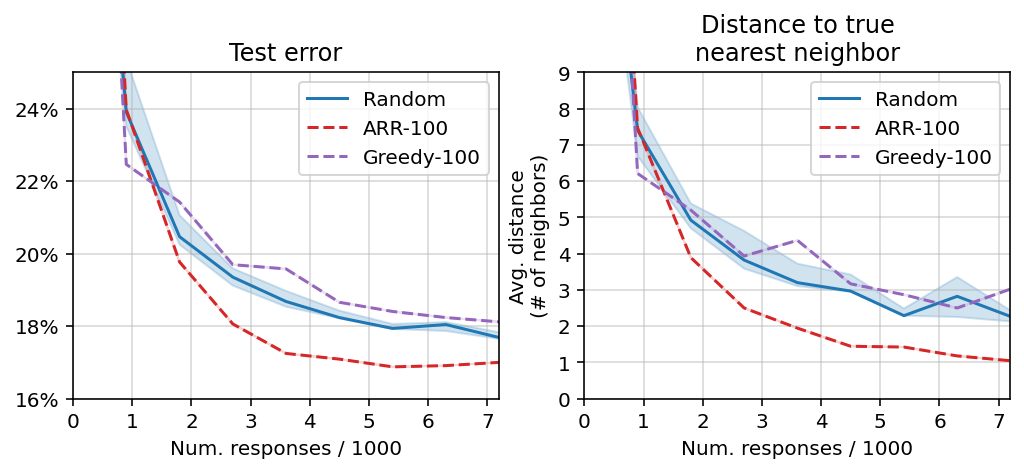

In [12]:
from viz import lineplot

l = "meta__sampling"
Greedy = greedy[greedy.meta__n_search == 100].copy()
Greedy[l] = "Greedy-100"
ARRm = arr[(arr.meta__n_top == 1) & (arr.meta__n_search == 10_000)].copy()
ARRm[l] = "ARR-100"
Salmon = arr[(arr.meta__n_top == 1) & (arr.meta__n_search == 90 * 89 * 88 // 2)].copy()
Salmon[l] = "Salmon"
NEXT_ = NEXT.copy()
NEXT_[l] = "NEXT"
Random_ = random.copy()
Random_[l] = "Random"

show = pd.concat((Greedy, ARRm, NEXT_, Random_, Salmon))

hue_order = ["Random", None, None, "ARR-100", "Greedy-100"]
static = dict(
    x="meta__len_X_train",
    hue="meta__sampling",
    hue_order=hue_order,
    style=["-", "-", "-", "--", "--"],
    palette=[f"C{k}" for k in range(len(hue_order))],
    data=show,
    ci=0.2,
)
w = 3
fig, axs = plt.subplots(ncols=2, figsize=(2 * 1.4 * w, w))
ax = lineplot(
    y="error",
    **static,
    ax=axs[0],
)
# ax.legend_.remove()

ax = lineplot(
    y="nn_diff_mean",
    **static,
    ax=axs[1],
)
axs = _fmt(axs)
axs[0].set_ylim(0.16, 0.25)
axs[1].yaxis.set_major_locator(plt.MultipleLocator(1))
fig.savefig("figures/synthetic-comparison-3.png", **save_kwargs)